In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.optimize import curve_fit
import sys
sys.path.append('../../weld')
import weld_dh2v
import weld_w2v

def exp(x, a, b, c):
    return a**(b*x) + c

def lin(x, a, b):
    return a*x + b

def quad(x, a, b, c):
    return a*x**2+b*x+c

width_data_file = open('200_layer_width_high_res.pickle', 'rb')
velocity_profile_file = open('200_layer_velocity_profile.pickle', 'rb')
width_data = pickle.loads(width_data_file.read())
velocity_profile = pickle.loads(velocity_profile_file.read())

In [2]:
print(len(velocity_profile))
velocity_map = np.zeros((len(velocity_profile),2))
position = 0
point_distance = 0.5
for idx, velocity in enumerate(velocity_profile):
    velocity_map[idx,0] = position
    velocity_map[idx,1] = velocity
    position+=point_distance
dH_min = weld_dh2v.v2dh_loglog(velocity_map[0,1], 200, "ER_4043")
print("Min DH: ", dH_min)
dH_max = weld_dh2v.v2dh_loglog(velocity_map[-1,1], 200, "ER_4043")
print("Max DH: ", dH_max)

h_profile = np.linspace(dH_min, dH_max, 1000)
vel_profile = weld_dh2v.dh2v_loglog(h_profile, 200, "ER_4043")

vel_interpolate = {}
position = 0
point_distance = 0.1
for vel in vel_profile:
    vel_interpolate[round(position,1)] = vel
    position+=point_distance

# fig,ax = plt.subplots(1,1)

# ax.scatter(velocity_map[:,0], velocity_map[:,1])
# ax.plot(vel_interpolate.keys(), vel_interpolate.values(), 'r')
# ax.set_title('vel map and vel interpolate')
# plt.show()


widths = []
widths_avg = []
x_coord = []
velocity = []

plot_flag = True

################
x_offset = 0
################

##Lump data for all layer widths
for key in width_data:
    x_coord.extend(list(width_data[key].keys()))
    for x in width_data[key].keys():
        x_round = round(x-x_offset,1)
        velocity.append(vel_interpolate[x_round])
        
    widths.extend(list(width_data[key].values()))
widths = np.array(widths)
x_coord = np.array(x_coord)

velocity = np.array(velocity)

200
Min DH:  2.9370000280823634
Max DH:  1.5571079209537801


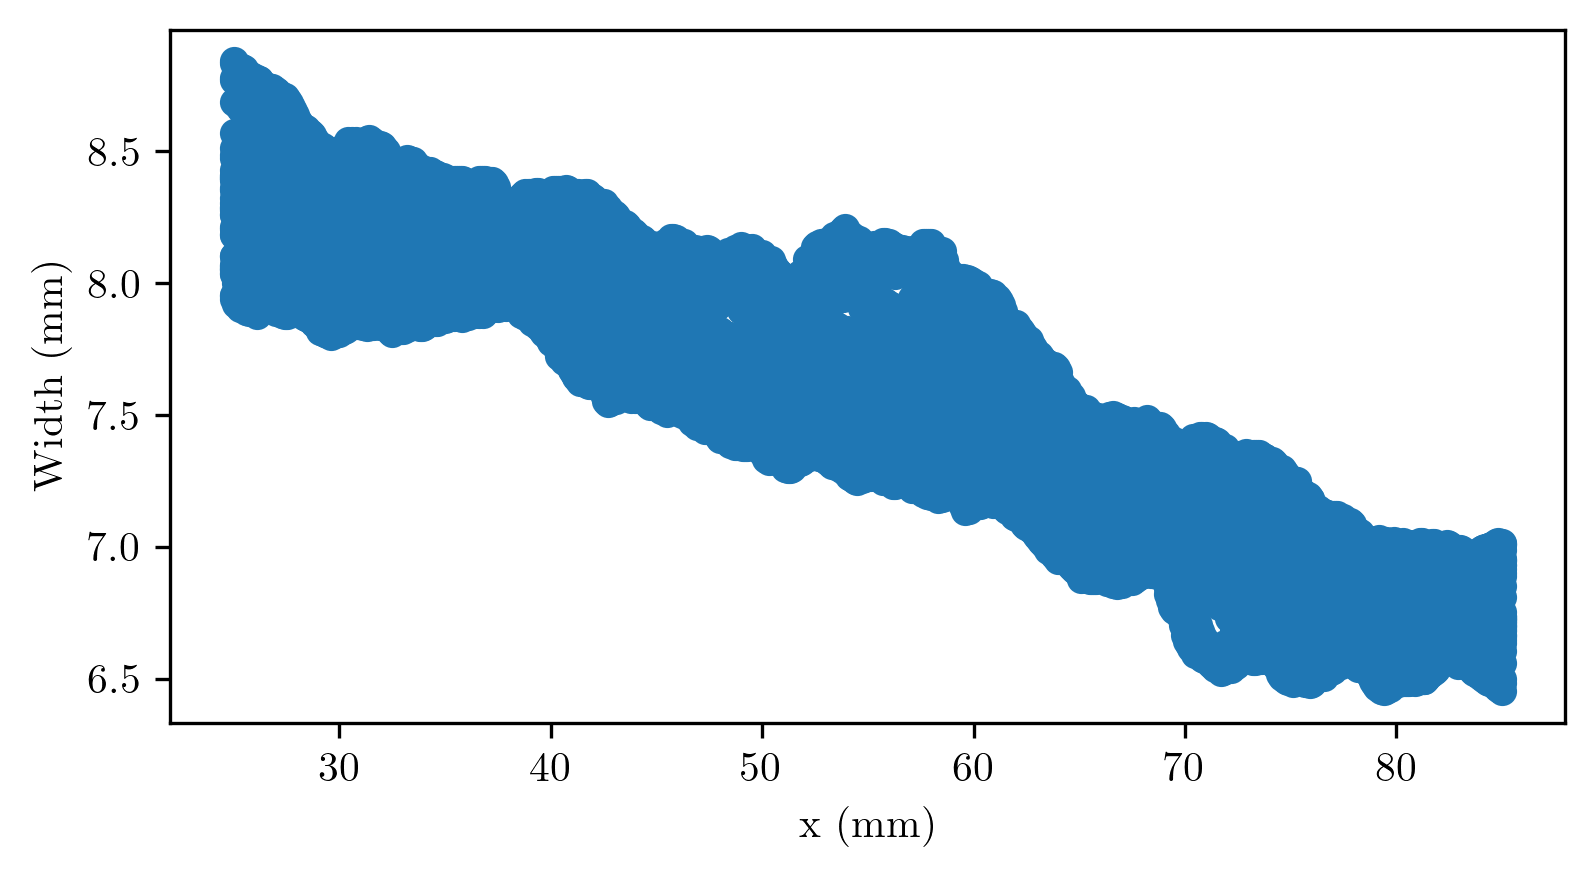

In [9]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig,ax = plt.subplots(1,1, )
fig.set_figheight(3)
fig.set_figwidth(6)
fig.dpi=300
ax.scatter(x_coord, widths)
ax.set_xlabel("x (mm)")
ax.set_ylabel("Width (mm)")
plt.show()